1: Loading the data 

**Instructions:** For this assignment we will develop a K-Nearest Neighbors (KNN) classifier to predict the 
affordability of cars. The list of classes is:

```
cheap
affordable
expensive
very expensive
```

We use a modified version of the Car data set from the UCI Machine learning repository.

The original data can be found here: https://archive.ics.uci.edu/ml/datasets/Automobile

The dataset consists of 204 instances. Each instance corresponds to a car which has a unique identifier (X; first field) and is characterized with 24 features as described in the file *car.names* which is provided as part of this assignment.

You need to first obtain this dataset, which is on Canvas (assignment 1). The files *car.features* and *car.labels* contain the data we will use in this notebook. Make sure the files are saved in the same folder as this notebook. 

Both files are in comma-separated value format. The first line in each file is a header, naming each feature (or label).

*car.features* contains 204 instances, one line per instance. The first field is the unique instance identifier. The following fields contain the 24 features, as described in the file *car.names*.

*car.labels* contains the gold labels (i.e., one of the four classes above), one instance per line. Again, the first field is the instance identifier, and the second field the instance label.

*car.names* contains additional explanations about the data set and the features.

All feature values are floats, and for Questions 1 through 5, we make the simplifying assumption that all values are indeed real-valued. You may want to revisit this assumption in Question 6.



**Task**: Read the two files  
1. create a **training_feature** set (list of features for the first 163 instances in the car.* files) and a **training_label** set (list of labels for the corresponding). 
2. create a **test_feature** set (list of features of the remaining instances in the car.* files) and a **test_label** set (list of labels for the corresponding). 
---------
- Do **not** shuffle the data.
- Do **not** modify feature or label representations. 
- Features must be represented as floats.
--------
You may use any Python packages you want, but not change the specified data types (i.e., they should be of type List, and *not* dataframe, dictionary etc).

In [3]:
data = open("car.features", 'r').readlines()
labels = open("car.labels", 'r').readlines()

train_features = []
train_labels   = []
test_features = []
test_labels   = []

###########################
## YOUR CODE BEGINS HERE
###########################

# separating headers from  instances
instances_features = data[1:]
instances_labels = labels[1:]

# creating training and test lists from features
features = []
for instance in instances_features:
    instance = instance.strip()
    instance = instance.split(",")
    inst_features = instance[1:25] 
    inst_features = [float(i) for i in inst_features]
    features.append(inst_features)
train_features = features[0:163]
test_features = features[163:]

# creating training and test lists from labels
labels = []
for instance in instances_labels:
    instance = instance.strip()
    instance = instance.split(",")
    inst_labels = instance[1]
    labels.append(inst_labels)
train_labels = labels[0:163]
test_labels = labels[163:]

###########################
## YOUR CODE ENDS HERE
###########################

print("number of train/test instances:",len(train_features), len(test_features))
print("number of train/test features:",len(train_features[40]), len(test_features[1]))


number of train/test instances: 163 41
number of train/test features: 24 24


2: Distance Functions

<b>Instructions</b>: Implement the three distance functions specified below. 

1. Euclidean distance
2. Cosine distance
3. Chebyshev distance, defined as:
    
    $d(x,y)=\max_{i}|x_i-y_i|$
    

Each distance function takes as input
- Two feature vectors (each of type List)

and returns as output
- The distance between the two feature vectors (float)

------------

Use <b>only</b> the library imported below, i.e., <b>do not</b> use implementations from any other Python library. 

In [4]:
import math as m

def euclidean_distance(fw1, fw2):
    distance = 0
    for i in range(len(fw1)):
        dist = (fw1[i] - fw2[i])**2
        distance = distance + dist
    distance = m.sqrt(distance)
    return distance

def cosine_distance(fw1, fw2):
    numerator = 0
    denominator1 = 0
    denominator2 = 0
    for i in range(len(fw1)):
        numerator = numerator + (fw1[i] * fw2[i])
        denominator1 += fw1[i]**2
        denominator2 += fw2[i]**2
    denominator1 = m.sqrt(denominator1)
    denominator2 = m.sqrt(denominator2)
    distance = 1 - (numerator/(denominator1 * denominator2))
    return distance

def chebyshev_distance(fw1, fw2):
    temp_list = []
    for i in range(len(fw1)):
        temp_list.append(abs((fw1[i]-fw2[i])))
    distance = max(temp_list)
    distance
    return distance

###########################
## YOUR CODE ENDS HERE
###########################

print(round(euclidean_distance(train_features[100],test_features[2]), 5))
print(round(chebyshev_distance(train_features[100],test_features[2]), 5))
print(round(cosine_distance(train_features[100],test_features[2]), 5))


600.17572
600.0
2e-05


3: KNN Classifier

<b>Instructions</b>: Here, you implement your KNN classifier. It takes as input 
- training data features
- training data labels
- test data features
- parameter K
- distance function(s) based on which nearest neighbors will be identified

It returns as output 
- the predicted labels for the test data

**Ties among distances**. If there are more than K instances with the same (smallest) distance value, consider the first K. For example, for K=1 if you have 3 instances (with identifiers i = 3, 12, 54) that all have the same distance to your test instance (e.g., 0.641), the instance with the smallest identifier should be selected as the nearest neighbor (in this case i = 3).

**Ties at prediction time.** Ties can also occur at class prediction time when two (or more) classes are supported by the same number of neighbors. In that case choose the class of the 1 nearest neighbor. The "1 nearest neighbor" refers only to those classes represented with the maximum support in the neighborhood. E.g., for K = 5, with a neighborhood ordered by distance: {'cheap', 'expensive', 'affordable', expensive', 'affordable'} you would choose the 1 nearest neighbor among {'expensive','affordable'}.

-----------

**You should implement the classifier from scratch yourself**, i.e., <b> you must not</b> use an existing implementation in any Python library. You may use Python packages (e.g., math, numpy, collections, ...) to help with your implementation.

In [5]:
def KNN(train_features, train_labels, test_features, k, dist_fun, weighted=False):
    
    predictions = []
    
    ###########################
    ## Your answer BEGINS HERE
    ###########################
    
    import collections as c

    for i in range(len(test_features)): #
        
        dic_dist_inst = [] # listing the calculated distances as dictionaries with their corresponding labels for each test instance

        for j in range(len(train_features)):
            dist = dist_fun(test_features[i], train_features[j])
            dic_dist_inst.append({"label":train_labels[j],"dist":dist})
        sorted_values = sorted(dic_dist_inst, key=lambda d: d['dist']) 
        k_nearest = sorted_values[0:k]  # k_nearest = list of the KNN as dictionaries with label names and corresponding values in ascending order (breaking ties among distances)

        ##### Majority Voting (Default) version starts, weighted = False ######
        
        if weighted == False: 
           
            kn_neighbors = [] # listing only the KNN labels in order according to their distances 
            for n in range(len(k_nearest)):
                kn_neighbors.append(k_nearest[n]["label"]) 
            counting = {m:kn_neighbors.count(m) for m in kn_neighbors} # counts the repeated labels showing the totals of each label in order as they come out (breaking ties at prediction time)
            prediction = max(counting, key = counting.get) # gets the first maximum value, so the label with lowest index number (breaking ties at prediction time)
            predictions.append(prediction)

        ##### Weighted version starts, weighted = True #####
            
        else: 

            kn_neighbors_weight = [] # listing the KNN as dictionaries with labels and correspoing weighted values
            totals = {} # sum up of weighted values for each label
            for n in range(len(k_nearest)):
                k_nearest[n]['dist'] = 1/(k_nearest[n]['dist'] + 0.000001) # changing dist value to weighted value          
                kn_neighbors_weight.append({k_nearest[n]["label"]:k_nearest[n]["dist"]})                                   
                totals = c.Counter(totals) + c.Counter(kn_neighbors_weight[n])
            prediction = max(totals, key = totals.get)
            predictions.append(prediction) 
        
    ###########################
    ## Your answer ENDS HERE
    ###########################
        
    return predictions


4: Weighted KNN Classifier

<b>Instructions</b>: Extend your implementation of the KNN classifier in Question 3 to a Weighted KNN classifier. You should change the code in the cell above. Use Inverse Distance as weights:

$w_j=\frac{1}{d_j+\epsilon}$

where

- $d_j$ is the distance of of the jth nearest neighbor to the test instance
- $\epsilon=0.000001$

Use the Boolean parameter `weighted` to specify the KNN version when calling the function.

5: Applying your KNN classifiers to the Car Dataset

**Using the functions you have implemented above, please**

<b> 1. </b>
For each of the distance functions you implemented in Question 2, construct (a) Nine majority voting KNN classifiers and (b) Nine weighted KNN classifiers, respectively, with 

- K=1
- K=5
- k=20

You will obtain a total of 18 (3 distance functions x 3 K values x 2 KNN versions) classifiers.

<b> 2. </b>
Compute the test accuracy for each model, where the accuracy is the fraction of correctly predicted labels over all predictions. Use the `accuracy_score` function from the `sklearn.metrics` package to obtain your accuracy.


In [6]:
from sklearn.metrics import accuracy_score

########################
# Your code STARTS HERE
########################


# Predictions:

predictions_knn_euc_1 = KNN(train_features, train_labels, test_features, 1, euclidean_distance, weighted=False)
predictions_knn_euc_5 = KNN(train_features, train_labels, test_features, 5, euclidean_distance, weighted=False)
predictions_knn_euc_20 = KNN(train_features, train_labels, test_features, 20, euclidean_distance, weighted=False)

predictions_knn_euc_1_w = KNN(train_features, train_labels, test_features, 1, euclidean_distance, weighted=True)
predictions_knn_euc_5_w = KNN(train_features, train_labels, test_features, 5, euclidean_distance, weighted=True)
predictions_knn_euc_20_w = KNN(train_features, train_labels, test_features, 20, euclidean_distance, weighted=True)

predictions_knn_cos_1 = KNN(train_features, train_labels, test_features, 1, cosine_distance, weighted=False)
predictions_knn_cos_5 = KNN(train_features, train_labels, test_features, 5, cosine_distance, weighted=False)
predictions_knn_cos_20 = KNN(train_features, train_labels, test_features, 20, cosine_distance, weighted=False)

predictions_knn_cos_1_w = KNN(train_features, train_labels, test_features, 1, cosine_distance, weighted=True)
predictions_knn_cos_5_w = KNN(train_features, train_labels, test_features, 5, cosine_distance, weighted=True)
predictions_knn_cos_20_w = KNN(train_features, train_labels, test_features, 20, cosine_distance, weighted=True)

predictions_knn_che_1 = KNN(train_features, train_labels, test_features, 1, chebyshev_distance, weighted=False)
predictions_knn_che_5 = KNN(train_features, train_labels, test_features, 5, chebyshev_distance, weighted=False)
predictions_knn_che_20 = KNN(train_features, train_labels, test_features, 20, chebyshev_distance, weighted=False)

predictions_knn_che_1_w = KNN(train_features, train_labels, test_features, 1, chebyshev_distance, weighted=True)
predictions_knn_che_5_w = KNN(train_features, train_labels, test_features, 5, chebyshev_distance, weighted=True)
predictions_knn_che_20_w = KNN(train_features, train_labels, test_features, 20, chebyshev_distance, weighted=True)

# Accuracy evaluations:

accuracy_knn_euc_1 = accuracy_score(test_labels, predictions_knn_euc_1)
accuracy_knn_euc_5 = accuracy_score(test_labels, predictions_knn_euc_5)
accuracy_knn_euc_20 = accuracy_score(test_labels, predictions_knn_euc_20)
 
accuracy_knn_euc_1_w = accuracy_score(test_labels, predictions_knn_euc_1_w)
accuracy_knn_euc_5_w = accuracy_score(test_labels, predictions_knn_euc_5_w)
accuracy_knn_euc_20_w = accuracy_score(test_labels, predictions_knn_euc_20_w)

accuracy_knn_cos_1 = accuracy_score(test_labels, predictions_knn_cos_1)
accuracy_knn_cos_5 =  accuracy_score(test_labels, predictions_knn_cos_5)
accuracy_knn_cos_20 = accuracy_score(test_labels, predictions_knn_cos_20)

accuracy_knn_cos_1_w = accuracy_score(test_labels, predictions_knn_cos_1_w)
accuracy_knn_cos_5_w =  accuracy_score(test_labels, predictions_knn_cos_5_w)
accuracy_knn_cos_20_w = accuracy_score(test_labels, predictions_knn_cos_20_w)

accuracy_knn_che_1 = accuracy_score(test_labels, predictions_knn_che_1)
accuracy_knn_che_5 = accuracy_score(test_labels, predictions_knn_che_5)
accuracy_knn_che_20 = accuracy_score(test_labels, predictions_knn_che_20)
 
accuracy_knn_che_1_w = accuracy_score(test_labels, predictions_knn_che_1_w)
accuracy_knn_che_5_w = accuracy_score(test_labels, predictions_knn_che_5_w)
accuracy_knn_che_20_w = accuracy_score(test_labels, predictions_knn_che_20_w)


########################
# Your code ENDS HERE
########################



print("Results on the *full* feature set")

print("\neuclidean (majority vote)")
print("K=1", round(accuracy_knn_euc_1, 3))
print("K=5", round(accuracy_knn_euc_5, 3))
print("K=20", round(accuracy_knn_euc_20, 3))

print("-----------\neuclidean (weighted)")
print("K=1", round(accuracy_knn_euc_1_w, 3))
print("K=5", round(accuracy_knn_euc_5_w, 3))
print("K=20", round(accuracy_knn_euc_20_w, 3))

print("\ncosine (majority vote)")
print("K=1", round(accuracy_knn_cos_1, 3))
print("K=5", round(accuracy_knn_cos_5, 3))
print("K=20", round(accuracy_knn_cos_20, 3))

print("-----------\ncosine (weighted)")
print("K=1", round(accuracy_knn_cos_1_w, 3))
print("K=5", round(accuracy_knn_cos_5_w, 3))
print("K=20", round(accuracy_knn_cos_20_w, 3))

print("\nchebyshev (majority vote)")
print("K=1", round(accuracy_knn_che_1, 3))
print("K=5", round(accuracy_knn_che_5, 3))
print("K=20", round(accuracy_knn_che_20, 3))

print("-----------\nchebyshev (weighted)")
print("K=1", round(accuracy_knn_che_1_w, 3))
print("K=5", round(accuracy_knn_che_5_w, 3))
print("K=20", round(accuracy_knn_che_20_w, 3))




Results on the *full* feature set

euclidean (majority vote)
K=1 0.756
K=5 0.707
K=20 0.634
-----------
euclidean (weighted)
K=1 0.756
K=5 0.683
K=20 0.756

cosine (majority vote)
K=1 0.805
K=5 0.707
K=20 0.659
-----------
cosine (weighted)
K=1 0.805
K=5 0.732
K=20 0.707

chebyshev (majority vote)
K=1 0.683
K=5 0.634
K=20 0.561
-----------
chebyshev (weighted)
K=1 0.683
K=5 0.683
K=20 0.756


6: Analysis


1. Consider these two sets of attributes: (curb-weight,engine-size) and (compression-ratio, peak-rpm)

    (a) For each set of features, create a scatter plot of data points coloring instances from each class differently. You should produce **two plots** which show the scattered data points colored by class label. Label the x-axis and y-axis. [*N.B. you may use libraries like <a href="https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py">matplotlib</a> or <a href="https://seaborn.pydata.org/introduction.html">seaborne</a>*] 
    
    (b) Which feature set is more informative in the context of this classification task and why?
    
    (c) What do you observe about the relationship between features in each feature set and how did you come to that conclusion?
    
    
   

2. Does the Weighted KNN outperform the Majority voting version, or vice versa? Hypothesize why (not). 



3. Do you think the accuracy is an appropriate evaluation metric for the *car* data set? Why (not)? 

 




1


1b)
The first feature set is more informative because the decision boundaries are smoother  and clearer compared to the second feature set, it means the classifier will perform better with more accurate predictions. Moreover, the data in the first feature doesn't have outliers or any small group of datapoints that behave differently from the rest of the data as shown in the second feature set.

1c)
Set 1: There is a strong positive linear relationship between the features, we could draw a straight line and most of the datapoints would fit the line or be near, so these features behave very similar and we could remove one in our model to reduce complexity and improve accuracy liability. 
Set 2: There is weak linear relationship, the datapoints are more sparse and they won't fit a straight line, so these features behave very different and also there is a group of datapoints that are very far from the majority, so they could be outliers which affect our predictions.


2
I think the Weighted KNN would outperform the Majority voting version in some cases when the dataset has not many outliers or much noise, and when the decision boundaries are smooth (better prediction on points that are near the borders). However I would prefer using the Inverse Linear Distance Weight instead of the normal Inverse Distance Weight, because the last one gives too much weight to the nearest neighbor, and this could be bad for datapoints that are not outliers but a bit far from the data, while the Inverse Linear Distance gives it weight but not too much.  In our car dataset the majority of the features don't seem to have many outliers looking at the range of values, so in this case and as we see in the accuracy reports, a weighted KNN has a small improvement in the accuracy compared to the majority voting KNN.

3 
Accuracy evaluation metric is useful to evaluate the performance of our KNN model, but it is not the appropriate because is the data is umbalanced and it is not penalising the variables that are highly correlated, it is not considering the impact of the errors (false positives and false negatives) so I think it but it would be better if we can evaluate precision and recall, so using multi-class F-score that considers both precision and recall would be more appropriate to evaluate our car dataset and have a better understanding of the performance of our model. Moreover, I would also evaluate the correlation between the variables to reduce those that are highly correlated to reduce complexity and improve accuracy liability.


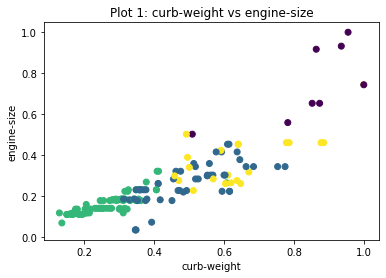

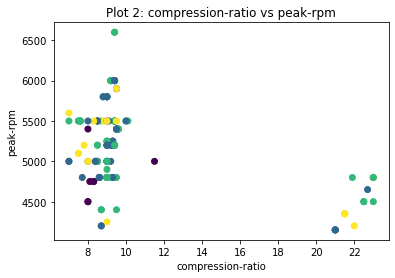

In [7]:
#### 1 a)

import matplotlib.pyplot as plt

################################################
# Your answer to Question 6 (2) STARTS HERE
################################################

header_features = list(data[0].split(','))
header_features_new = header_features[1:]

# First plot: curb-weight,engine-size

x1_index = header_features_new.index('curb-weight')
x1 = []
for i in range(len(train_features)):
    inst = train_features[i]
    x1.append(inst[x1_index])

y1 = []
y1_index = header_features_new.index('engine-size')
for i in range(len(train_features)):
    inst = train_features[i]
    y1.append(inst[y1_index])

train_labels_set = list(set(train_labels)) 
train_labels_color = []
for i in train_labels:
    color = train_labels_set.index(i)
    train_labels_color.append(color)

plt.scatter(x1, y1, c=train_labels_color)
plt.title("Plot 1: curb-weight vs engine-size")
plt.xlabel("curb-weight")
plt.ylabel("engine-size")
plt.show()


# Second plot: compression-ratio, peak-rpm

x2_index = header_features_new.index('compression-ratio')
x2 = []
for i in range(len(train_features)):
    inst = train_features[i]
    x2.append(inst[x2_index])

y2 = []
y2_index = header_features_new.index('peak-rpm')
for i in range(len(train_features)):
    inst = train_features[i]
    y2.append(inst[y2_index])

train_labels_set = list(set(train_labels)) 
train_labels_color = []
for i in train_labels:
    color = train_labels_set.index(i)
    train_labels_color.append(color)

plt.scatter(x2, y2, c=train_labels_color)
plt.title("Plot 2: compression-ratio vs peak-rpm")
plt.xlabel("compression-ratio")
plt.ylabel("peak-rpm")
plt.show()


################################################
# Your answer to Question 6 (2) ENDS HERE
################################################



   <b>Signed by</b>: Alejandra Victoria Abril Pareja
   
   <b>Dated</b>: 12/08/2022